# Task 17
## Practical Task 2

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer 

In [2]:
#import data
df =pd.read_csv("diabetes_updated.csv",)

In [3]:
# get idea of information (shape, columns, dtypes, info, head, and some basic visualisations colour coded by outcome 
df.shape

(768, 9)

In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
#no values listed as null however visible 0 in Skin thickness and insulin columns suggestive of missing data. 

In [9]:
df.mean()

Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

In [10]:
ins_group = df.loc[df['Insulin'] != 0]
ins_mean = int( ins_group['Insulin'].mean())

df.loc[df["Insulin"]==0,"Insulin"]= ins_mean

In [11]:
ins_group = df.loc[df['SkinThickness'] != 0]
st_mean = int( ins_group['SkinThickness'].mean())

df.loc[df["SkinThickness"]==0,"SkinThickness"]= st_mean

In [12]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,155,33.6,0.627,50,1
1,1,85,66,29,155,26.6,0.351,31,0
2,8,183,64,29,155,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
df.mean()

Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                29.108073
Insulin                     155.281250
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

<Axes: xlabel='Outcome', ylabel='count'>

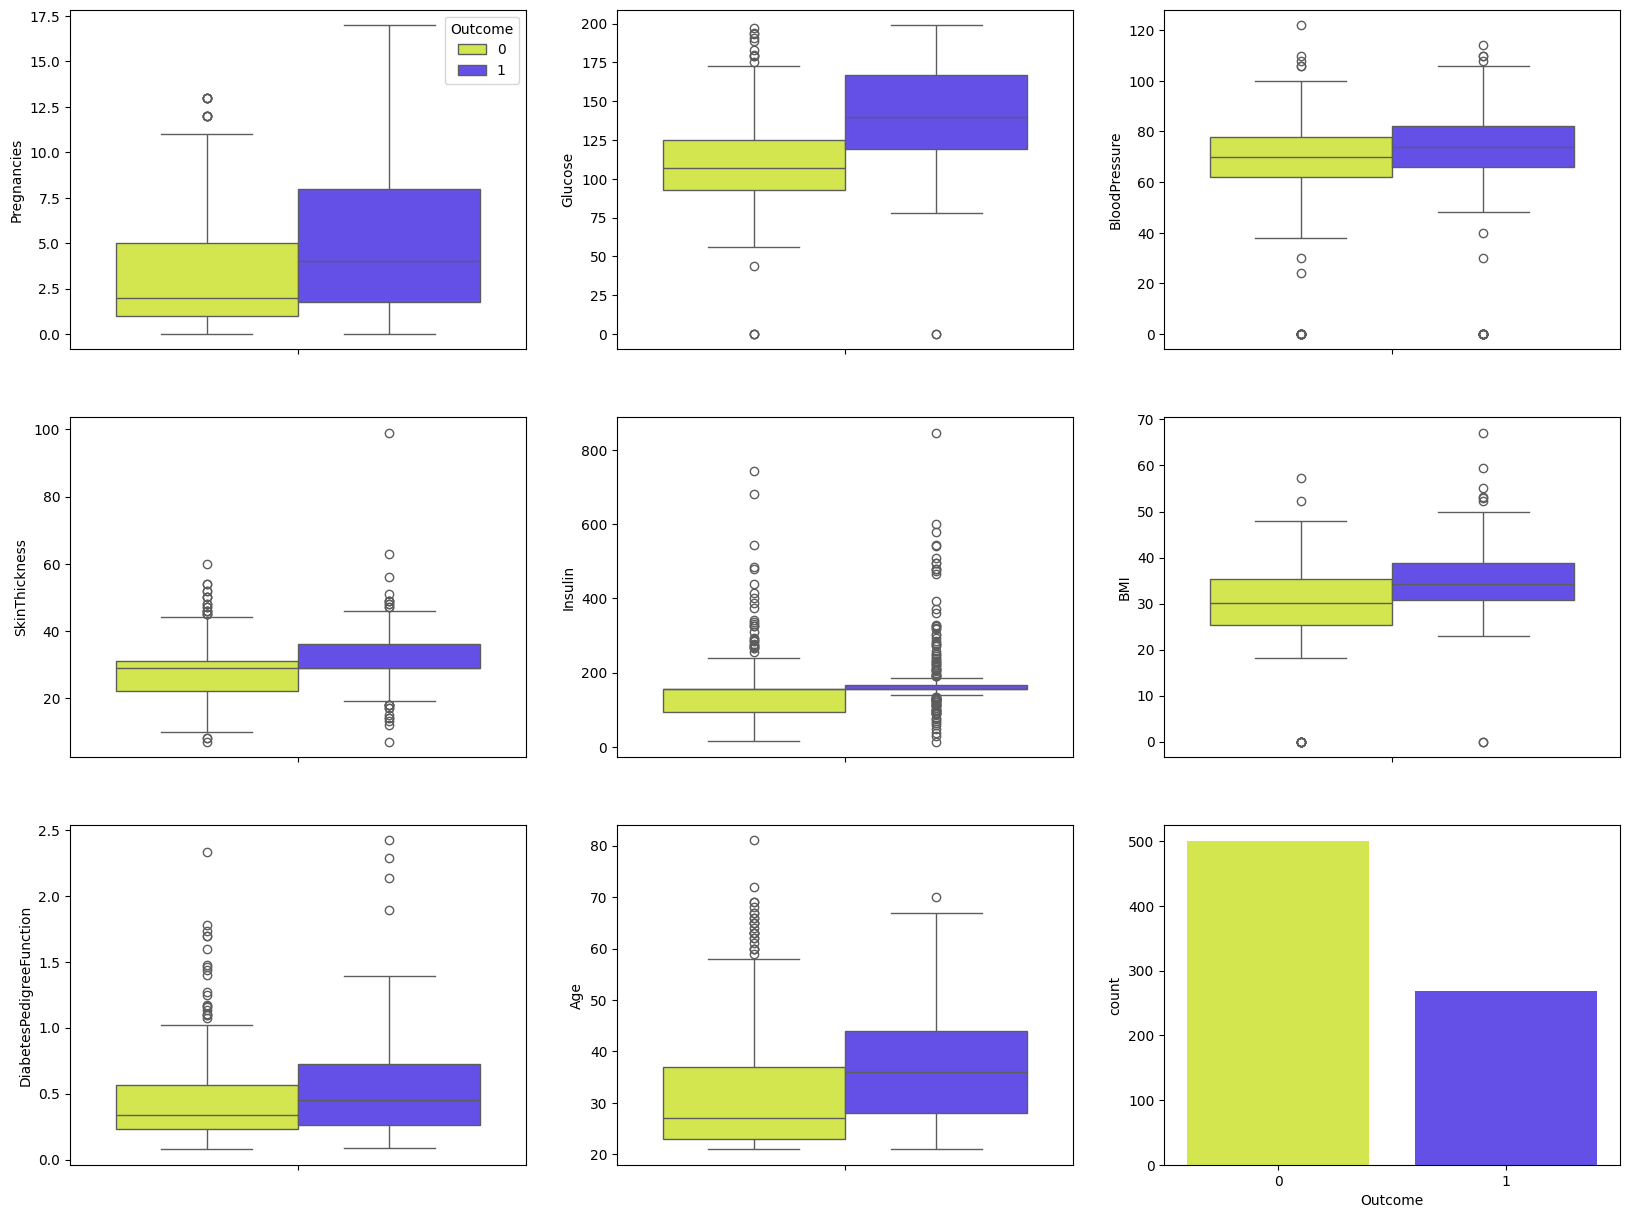

In [14]:
fig, ((axis1,axis2,axis3),(axis4,axis5,axis6),(axis7,axis8,axis9)) = plt.subplots(3,3, figsize=(20,15))

sns.boxplot(data = df,
            y = 'Pregnancies',
            hue = 'Outcome',
            palette = ["#E5FF37", "#5137ff"],
            legend = True,
            ax=axis1,)

sns.boxplot(data = df,
            y= 'Glucose',
            hue = 'Outcome',
            palette = ["#E5FF37", "#5137ff"],
            legend = False,
            ax=axis2,)

sns.boxplot(data = df,
            y= 'BloodPressure',
            hue = 'Outcome',
            palette = ["#E5FF37", "#5137ff"],
            legend = False,
            ax=axis3,)

sns.boxplot(data = df,
            y= 'SkinThickness',
            hue = 'Outcome',
            palette = ["#E5FF37", "#5137ff"],
            legend = False,
            ax=axis4,)

sns.boxplot(data = df,
              y= 'Insulin',
              hue = 'Outcome',
              palette = ["#E5FF37", "#5137ff"],
              legend = False,
              ax=axis5,)

sns.boxplot(data = df,
            y= 'BMI',
            hue = 'Outcome',
            palette = ["#E5FF37", "#5137ff"],
            legend = False,
            ax=axis6,)

sns.boxplot(data = df,
            y= 'DiabetesPedigreeFunction',
            hue = 'Outcome',
            palette = ["#E5FF37", "#5137ff"],
            legend = False,
            ax=axis7,)

sns.boxplot(data = df,
            y= 'Age',
            hue = 'Outcome',
            palette = ["#E5FF37", "#5137ff"],
            legend = False,
            ax=axis8,)

sns.countplot(data = df,
            x = 'Outcome',
            hue = 'Outcome',
            palette = ["#E5FF37", "#5137ff"],
            legend = False,
            ax=axis9,)

## set independent variables to X and dependent variables to Y


## Independent Variables:
* Pregnancies (Number of Pregnancies had)
* Glucose (Plasma glucose concentration over 2 hours in an oral glucose tolerance test)
* Blood Pressure (Diastolic blood pressure (mm Hg))
* Skin Thickness (Triceps skin fold thickness (mm))
* Insulin (2-Hour serum insulin (mu U/ml))
* BMI (Body mass index (weight in kg/(height in m)2))
* Diabetes Pedigree Function (Diabetes pedigree function (a function which scores likelihood of diabetes based on family history))
* Age (Age in years)


Dependent Variable: 
* Outcome (0 if non-diabetic, 1 if diabetic)

## Simple linear regression 
Y ≈ β0 + β1X1 + β2X2 ... 
<br>
β0 = intercept <br>
β1 = slope <br>

### Create an empty linear regression model
model_s = LinearRegression()

### Create the model
model_s.fit(x,y)

## Multiple linear regression 
Y ≈ β0 + β1Xi
<br>
β0 = intercept <br>
β1 = slope <br>

### Create an empty linear regression model
model_s = LinearRegression()

### Create the model
model_s.fit(x,y)


In [15]:
# To ensure compatability model inputs must be same shape (number_samples, number_features)
# Select and reshape data

In [16]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age',]]
y = df['Outcome']

## generate training and test sets comprisiong of 80% and 20% of the data respectively

In [17]:
# Split data into training and test sets
rseed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  random_state=rseed, shuffle=True, stratify=y)

print ("Training data:",X_train.shape, y_train.shape)
print ("Test data:",X_test.shape, y_test.shape)

Training data: (614, 8) (614,)
Test data: (154, 8) (154,)


## carefully analyse the types of features in this data set. Identify which features require use of StandardScaler from sklearn.preprocessing.

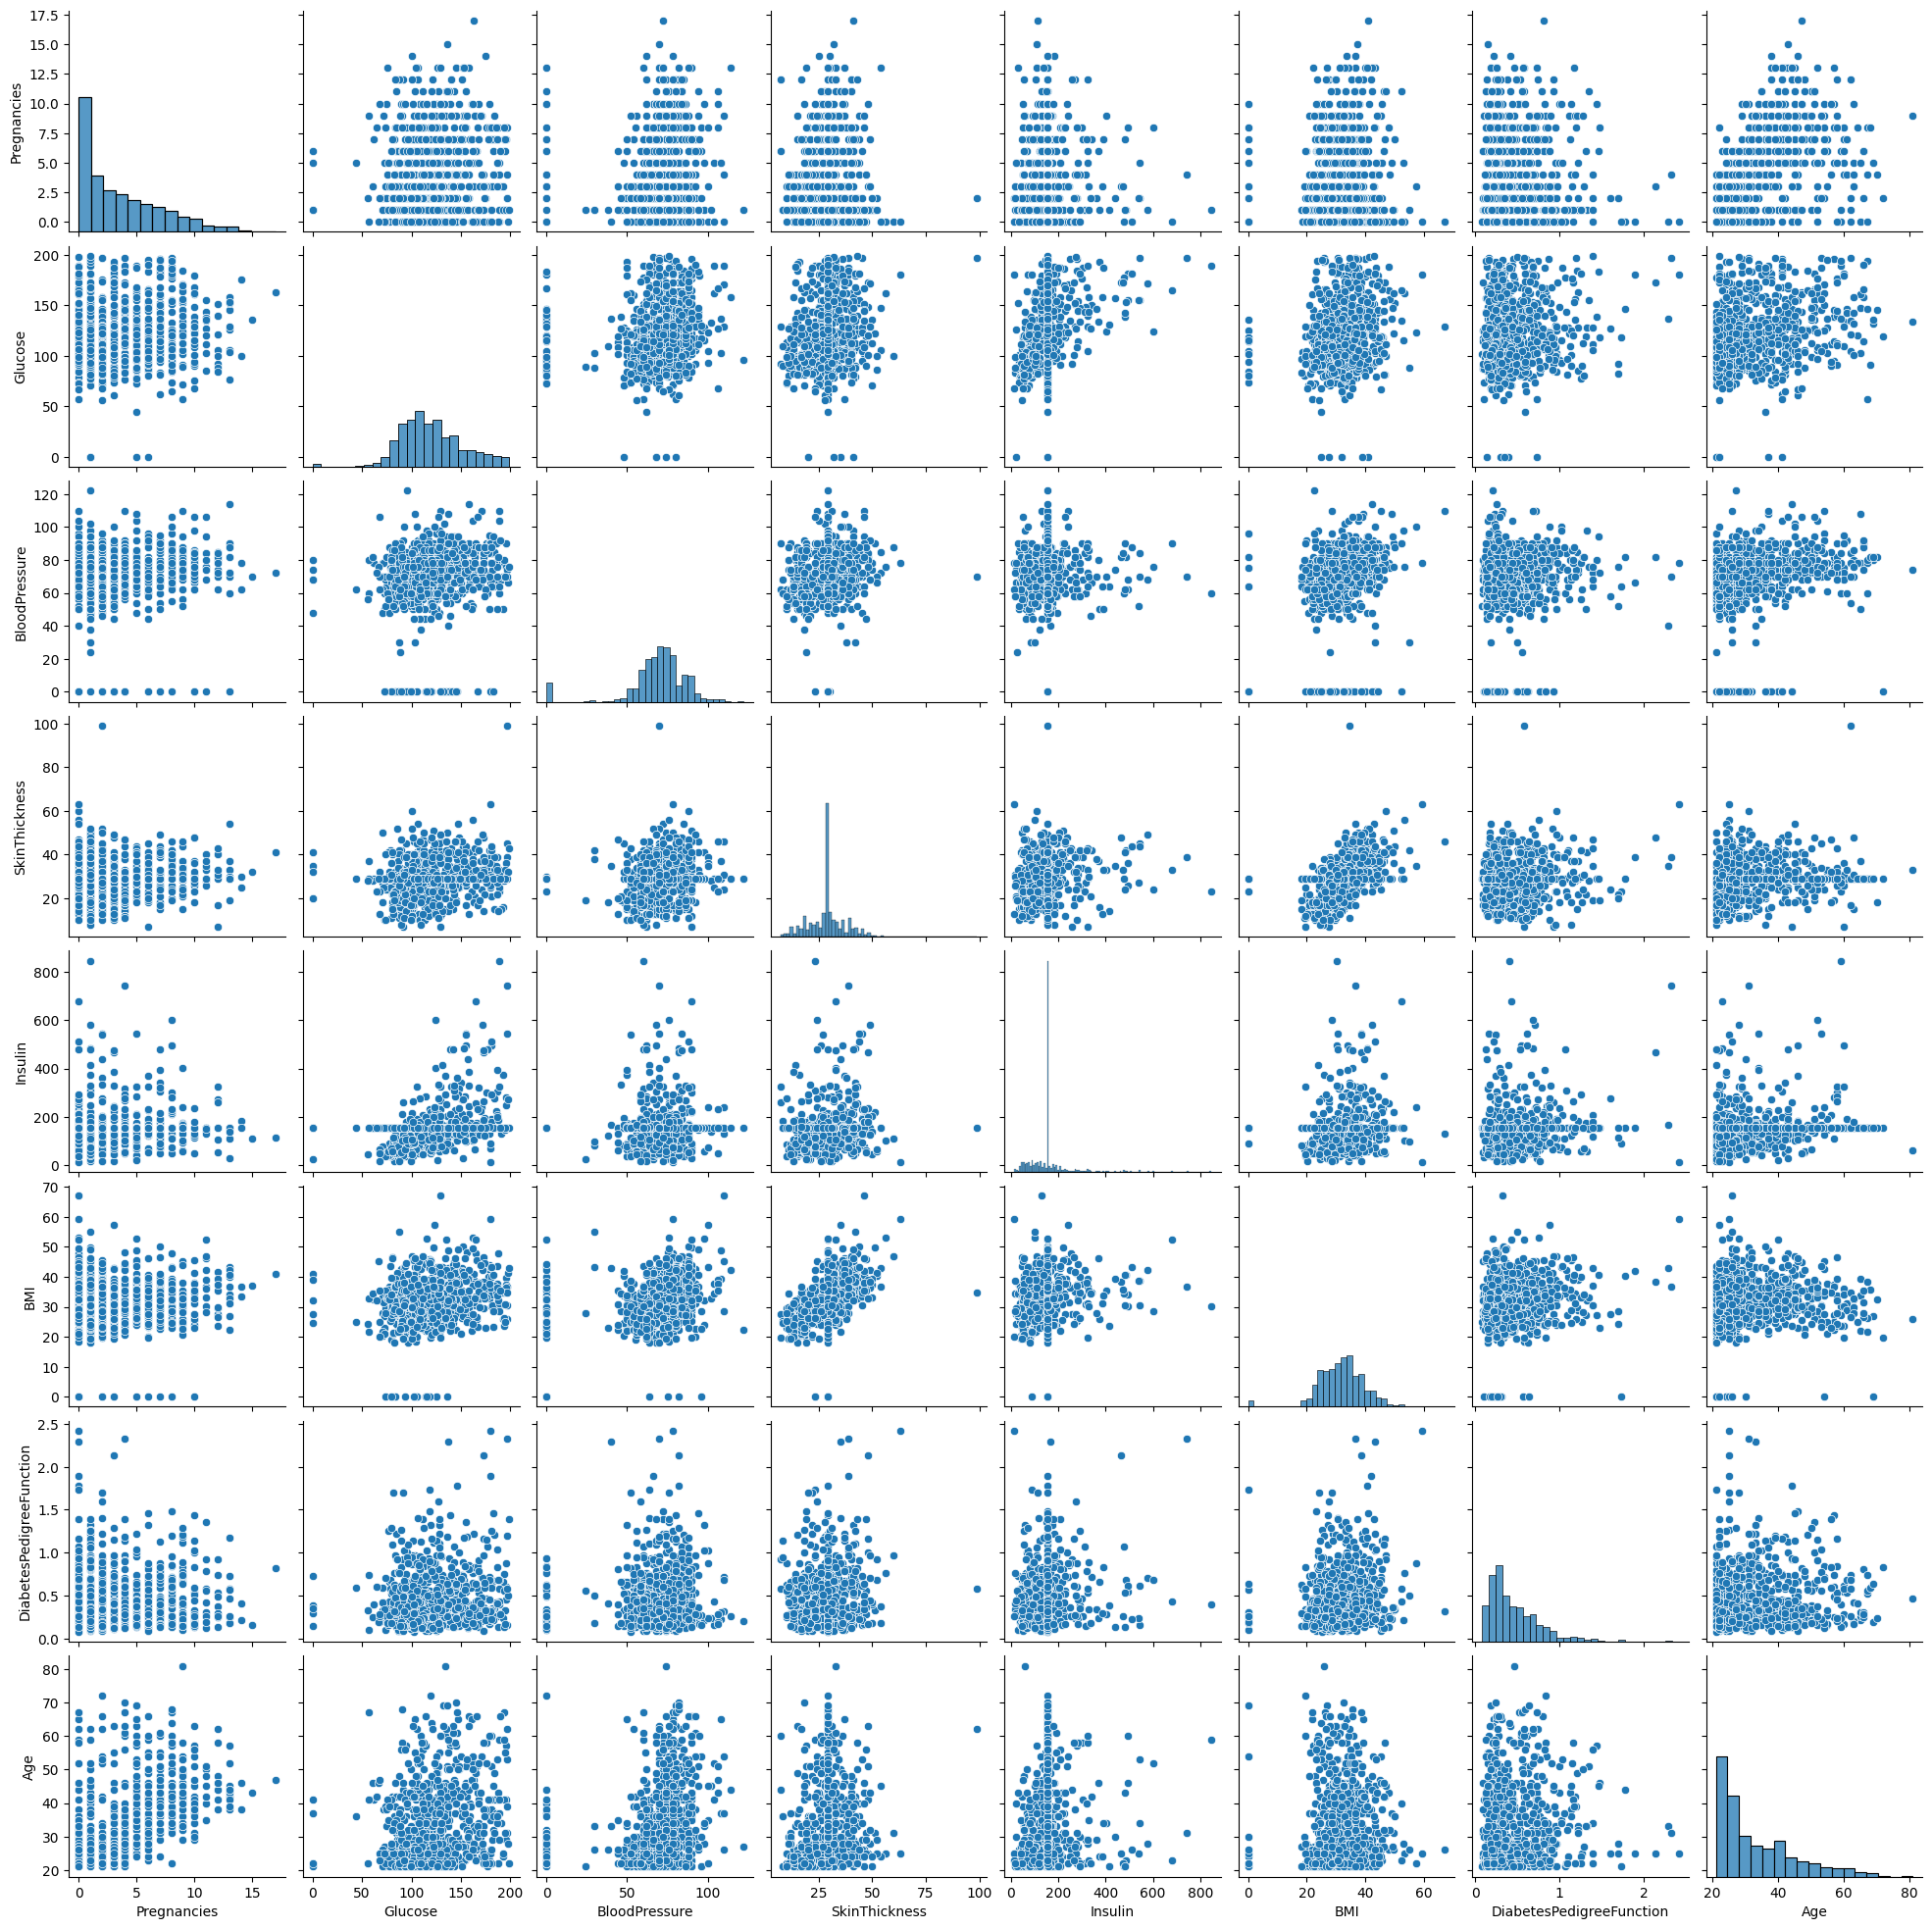

In [18]:
sns.pairplot(data =df.drop('Outcome', axis=1))

Standard scaler is good when data follows a normal/ gaussian distribution (bell curve)
* glucose
* blood pressure
* skin thickness
* Insulin
* BMI

MinMaxScaler is better when there isnt normal/ gaussian distribution
* pregnancies
* DPF
* Age

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age',]

sklearn.compose.ColumnTransformer(transformers, *, remainder='drop', sparse_threshold=0.3, n_jobs=None, transformer_weights=None, verbose=False, verbose_feature_names_out=True)

In [19]:
ss = StandardScaler()
mms = MinMaxScaler()

ct = ColumnTransformer(
    [("ss1", StandardScaler(),['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']),
     ("mms1", MinMaxScaler(),['Pregnancies', 'DiabetesPedigreeFunction', 'Age'])])

X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)


## Generate a multiple linear regression model using the training set. 

In [20]:
lm = LinearRegression()
model_m = lm.fit(X_train,y_train)
predictions = lm.predict(X_test)

# Create line coordinates
X_line = np.empty(X_test.shape)
for i in range(X_test.shape[1]):
    X_line[:, i] = np.linspace(np.min(X_test[:,i]), np.max(X_test[:,i]), num=X_test.shape[0])
y_line = lm.predict(X_line)


## Print out the intercept and coefficcients of the trained model. 

In [21]:
# Get intercept and coefficients
print('Intercept: \n', model_m.intercept_)
print('Coefficients: \n', model_m.coef_)

Intercept: 
 0.19854400910999426
Coefficients: 
 [ 0.18616511 -0.03093269  0.01483123  0.00391653  0.10044889  0.31502709
  0.27673784  0.14904314]


outcome =  0.19854400910999426 (intercept) + 0.18616511(pregnancies)  - 0.03093269(glucose) + 0.01483123(blood pressure)  + 0.00391653(skin thickness) + 0.10044889(insulin)  + 0.31502709 (BMI) + 0.27673784 (DPF)  + 0.14904314 (Age)


## Generate predictions for the test set 
compare valuses used to make these predictions to the ones in the original diabetes data set. What needs to be done to make the interpretations of our predictions more meaningful?

In [22]:
predictions[0:5]

array([ 0.57697109,  0.12921395,  0.34184855,  0.35040662, -0.32857654])

## Compute R-squared for your model on the test set. 
use r2_score from sklearn.metrics

In [23]:
print ("R2 Score:", round(model_m.score(X_test, y_test),4))

R2 Score: 0.2622


R2 or coefficient of determination normally ranges from 0 to 1
This score is not close to 1, which suggests that our model does not fits our observations well.